In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib as plt
%matplotlib inline

C:\Users\PC\AppData\Local\Temp\ipykernel_620\2442076835.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('Training Data.csv')
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
data.shape

(252000, 13)

In [5]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
pd.crosstab(data['Risk_Flag'], data['Income'], margins=True)

Income,10310,10675,11114,11430,11483,11550,11695,11735,11799,11854,...,9996861,9996946,9996947,9996969,9998070,9998280,9999180,9999400,9999938,All
Risk_Flag,,,,,,,,,,,,,,,,,,,,,
0,37,6,14,37,0,1,0,1,1,1,...,1,1,1,1,34,1,36,1,1,221004
1,0,31,22,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,30996
All,37,37,36,37,1,1,1,1,1,1,...,1,1,1,1,34,1,36,1,1,252000


<Axes: >

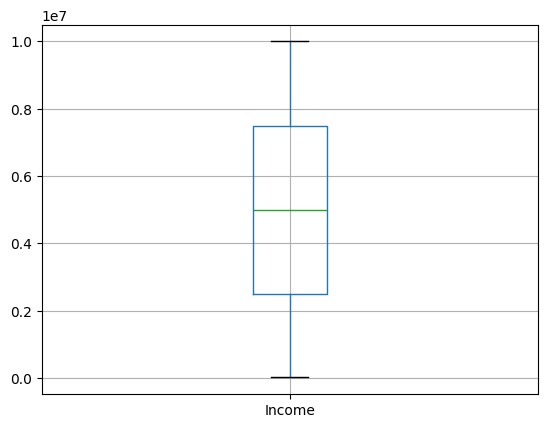

In [7]:
data.boxplot(column='Income')

In [8]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [9]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
x=data.iloc[:,np.r_[1:5,7:10,12:13]].values
y=data.iloc[:,12].values

In [11]:
x

array([[1303834, 23, 3, ..., 'Rewa', 'Madhya_Pradesh', 0],
       [7574516, 40, 10, ..., 'Parbhani', 'Maharashtra', 0],
       [3991815, 66, 4, ..., 'Alappuzha', 'Kerala', 0],
       ...,
       [4522448, 46, 7, ..., 'Kalyan-Dombivli', 'Maharashtra', 0],
       [6507128, 45, 0, ..., 'Pondicherry', 'Puducherry', 0],
       [9070230, 70, 17, ..., 'Avadi', 'Tamil_Nadu', 0]], dtype=object)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
data.shape[1]

13

In [14]:
classifier = RandomForestClassifier()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x = LabelEncoder()

In [16]:
for i in range(0, 7):
 x_train[:,i]= label_encoder_x.fit_transform(x_train[:,i])

In [17]:
x_train

array([[31534, 49, 18, ..., 270, 20, 0],
       [9146, 18, 0, ..., 311, 22, 0],
       [3423, 18, 9, ..., 123, 23, 0],
       ...,
       [31174, 4, 5, ..., 6, 20, 0],
       [23114, 19, 2, ..., 95, 25, 0],
       [10367, 49, 7, ..., 59, 11, 0]], dtype=object)

In [18]:
label_encoder_y = LabelEncoder()
y_train= label_encoder_y.fit_transform(y_train)

In [19]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
for i in range(0, 7):
 x_test[:,i]= label_encoder_x.fit_transform(x_test[:,i])

In [21]:
label_encoder_y = LabelEncoder()
y_test = label_encoder_y.fit_transform(y_test)

In [22]:
x_test

array([[5705, 26, 18, ..., 118, 0, 0],
       [11373, 23, 2, ..., 210, 0, 0],
       [10494, 34, 9, ..., 229, 2, 0],
       ...,
       [11233, 47, 1, ..., 143, 0, 1],
       [735, 14, 20, ..., 181, 28, 0],
       [4522, 47, 7, ..., 269, 13, 0]], dtype=object)

In [23]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [27]:
user_data = np.array([[25, 'Male', 'Single', 'Yes', 50000, 'Graduate', 'No', 1]])
user_data_encoded = np.zeros(user_data.shape)
for i in range(0, 7):
    user_data_encoded[0, i] = label_encoder_x.fit_transform([user_data[0, i]])[0]

In [28]:
prediction = classifier.predict(user_data_encoded)

In [29]:
if prediction[0] == 1:
    print("Congratulations! You are eligible for a loan.")
else:
    print("Sorry, you are not eligible for a loan.")

Sorry, you are not eligible for a loan.


In [30]:
probability_of_approval = classifier.predict_proba(user_data_encoded)[:, 1]
print(f"Probability of loan approval: {probability_of_approval[0]:.2%}")

Probability of loan approval: 5.00%
